GPU kullandığımız için kimlik doğrulama işlemleri yapmamız gerekiyor ve aşağıdaki kodu ekliyoruz.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Kullanacağımız keras kütüphanesini kuruyoruz.

In [ ]:
!pip3 install -q keras

Kullanacağımız paketleri yüklüyoruz.

In [ ]:
from __future__ import print_function
import keras
#aşağıdaki komut keras içerisinde bulunan fashion_mnist veri setini yüklemek içindir.
from keras.datasets import fashion_mnist
#eğitilmiş model kullanacağımız için bunu keras modellerinden yüklüyoruz.
from keras.models import load_model
import os
import numpy as np
#görselleştirmeler için matplotlib kullanıyoruz
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import random
import pandas as pd


Verileri yüklüyoruz

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, x_train.shape)
print(x_test.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000, 28, 28)
(10000, 28, 28) (10000, 28, 28)


Yukarıdaki kod çıktısı bize verileri 4 part halinde aldiği ve bunun bölünme sayılarını, verilerinin şekil bilgilerini verir.

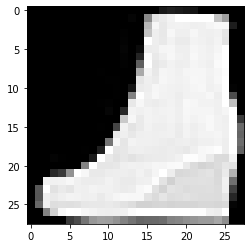

In [ ]:
#veriler içinden seçtiğimiz örneği siyah beyaz şekilde görmek için kodumuz:
plt.imshow(x_train[465], cmap = 'gray')

Veri setimiz hakkında fikir edinmek için aşagıdaki fotoğraf ve gife bakabiliriz.

In [ ]:
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

In [ ]:
# fashion mnist etiket isimlerini değiştiriyoruz.
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bot'])

**Aşağıdaki hücrede yapacağımız işlem daha önce eğitilmiş olan modelin ağırlıklarını` model_fashion-mnist_cnn_train2_epoch24.h5`dosyasından çekmek ve giriş görüntülerini model girişine uygun şekilde ön işlemlerden geçirmektir.**

In [ ]:
root = 'drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/NesneTanima/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')